In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [38]:
# Load the dataset
dataset = pd.read_csv(r"C:\Users\shrey\Downloads\hand sign\sign_mnist_train.csv")

In [39]:
# Split features and labels
X = dataset.drop('label', axis=1).values
y = dataset['label'].values

In [40]:
# Reshape and normalize the data
X = X.reshape(-1, 28, 28, 1) / 255.0

In [41]:
# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical
y = to_categorical(y, num_classes=26)

In [42]:
# Split the remaining dataset into training and validation sets
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Build CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(26, activation='softmax')
])

In [44]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

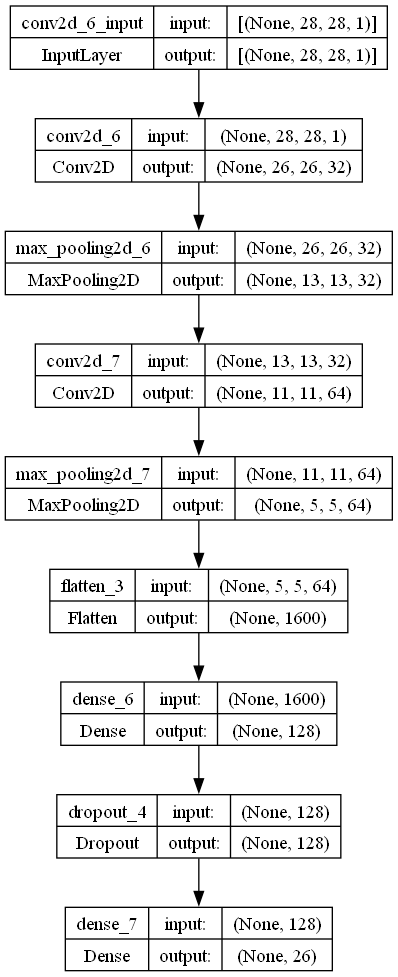

In [45]:
# Visualize model architecture
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

In [46]:
# Train the model
mod = model.fit(X_train, y_train, epochs=10, validation_data=(X_validation, y_validation))

Epoch 1/10
687/687 [==============================] - 7s 10ms/step - loss: 1.2664 - accuracy: 0.6084 - val_loss: 0.2919 - val_accuracy: 0.9129
Epoch 2/10
687/687 [==============================] - 7s 11ms/step - loss: 0.2392 - accuracy: 0.9236 - val_loss: 0.0605 - val_accuracy: 0.9925
Epoch 3/10
687/687 [==============================] - 7s 10ms/step - loss: 0.0896 - accuracy: 0.9738 - val_loss: 0.0148 - val_accuracy: 0.9978
Epoch 4/10
687/687 [==============================] - 8s 11ms/step - loss: 0.0560 - accuracy: 0.9824 - val_loss: 0.0052 - val_accuracy: 0.9995
Epoch 5/10
687/687 [==============================] - 7s 10ms/step - loss: 0.0360 - accuracy: 0.9893 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 6/10
687/687 [==============================] - 7s 10ms/step - loss: 0.0302 - accuracy: 0.9906 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 7/10
687/687 [==============================] - 7s 10ms/step - loss: 0.0263 - accuracy: 0.9920 - val_loss: 0.0017 - val_accuracy: 1.0000

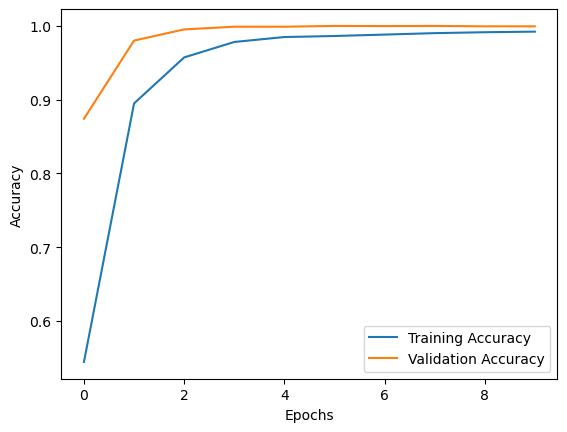

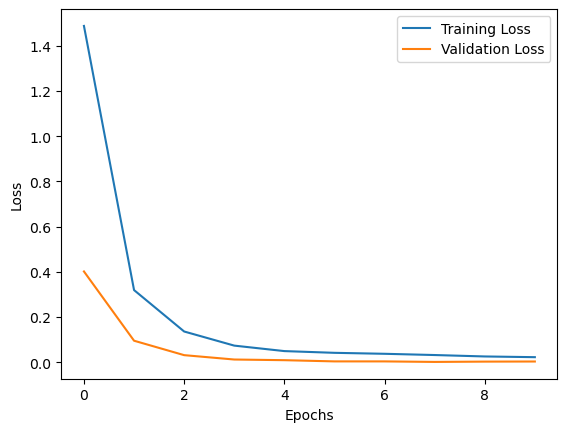

In [25]:
# Plot training and validation accuracy
plt.plot(mod.history['accuracy'], label='Training Accuracy')
plt.plot(mod.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('training_validation_accuracy.png')
plt.show()

# Plot testing accuracy and loss
plt.plot(mod.history['loss'], label='Training Loss')
plt.plot(mod.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('testing_loss_accuracy.png')
plt.show()

In [26]:
test_dataset = pd.read_csv(r"C:\Users\shrey\Downloads\hand sign\sign_mnist_test.csv")

# Splitting features and labels
X_test = test_dataset.drop('label', axis=1).values
y_test = test_dataset['label'].values

# Reshape and normalize the data
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

# Convert labels to one-hot encoding
y_test = to_categorical(y_test, num_classes=26)


In [27]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

225/225 [==============================] - 1s 3ms/step - loss: 0.3802 - accuracy: 0.9109
Test Loss: 0.3801673650741577
Test Accuracy: 0.9109035134315491


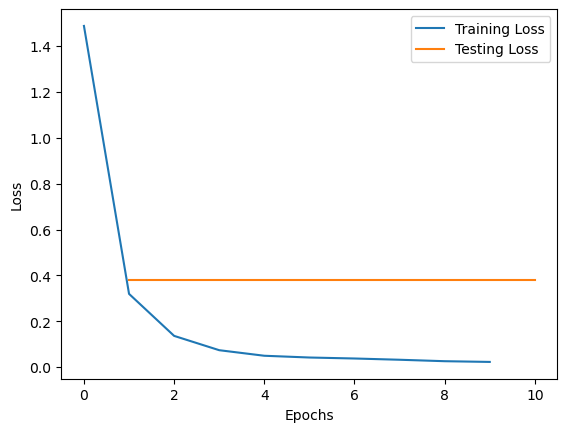

In [28]:
# Plot test loss and train loss
plt.plot(mod.history['loss'], label='Training Loss')
plt.plot(range(1, len(mod.history['loss']) + 1), [test_loss] * len(mod.history['loss']), label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('test_train_loss.png')
plt.show()

In [47]:
# Additional Dropout layer with 0.3 rate

In [29]:
from tensorflow.keras.layers import Dropout

# Build CNN architecture with additional dropout layer
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dropout(0.3),  # Additional dropout layer with rate 0.3
    Dense(26, activation='softmax')
])

In [30]:
# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

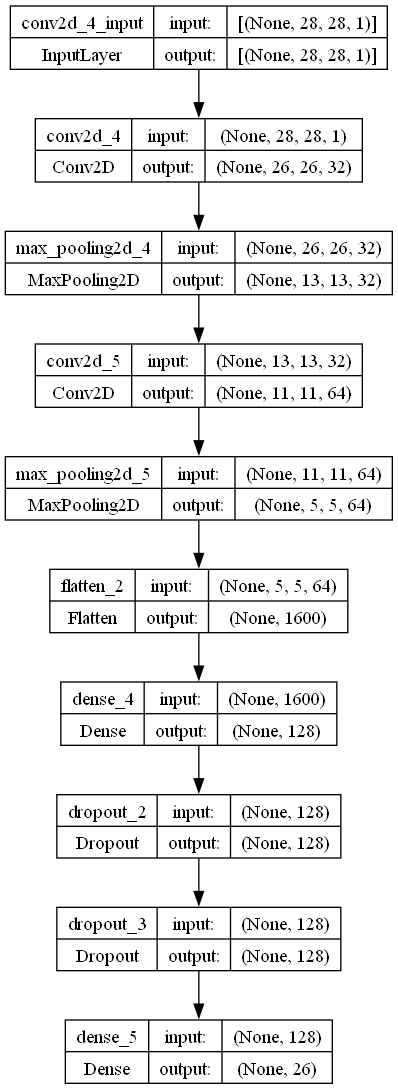

In [31]:
# Visualize model architecture
from tensorflow.keras.utils import plot_model
plot_model(model2, to_file='model2_architecture.png', show_shapes=True, show_layer_names=True)

In [32]:
# Train the model
models = model2.fit(X_train, y_train, epochs=10, validation_data=(X_validation, y_validation))

Epoch 1/10
687/687 [==============================] - 6s 9ms/step - loss: 1.5381 - accuracy: 0.5255 - val_loss: 0.3576 - val_accuracy: 0.9157
Epoch 2/10
687/687 [==============================] - 6s 9ms/step - loss: 0.4373 - accuracy: 0.8522 - val_loss: 0.0892 - val_accuracy: 0.9849
Epoch 3/10
687/687 [==============================] - 6s 9ms/step - loss: 0.2293 - accuracy: 0.9216 - val_loss: 0.0372 - val_accuracy: 0.9954
Epoch 4/10
687/687 [==============================] - 7s 9ms/step - loss: 0.1548 - accuracy: 0.9462 - val_loss: 0.0189 - val_accuracy: 0.9967
Epoch 5/10
687/687 [==============================] - 6s 9ms/step - loss: 0.1076 - accuracy: 0.9624 - val_loss: 0.0064 - val_accuracy: 0.9991
Epoch 6/10
687/687 [==============================] - 7s 10ms/step - loss: 0.0885 - accuracy: 0.9709 - val_loss: 0.0042 - val_accuracy: 0.9996
Epoch 7/10
687/687 [==============================] - 7s 10ms/step - loss: 0.0677 - accuracy: 0.9764 - val_loss: 0.0035 - val_accuracy: 0.9998
Epoc

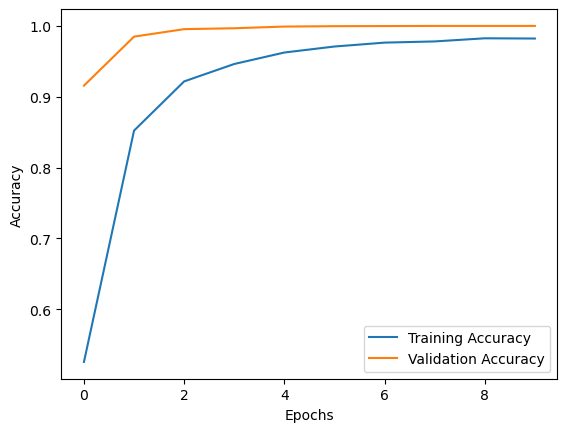

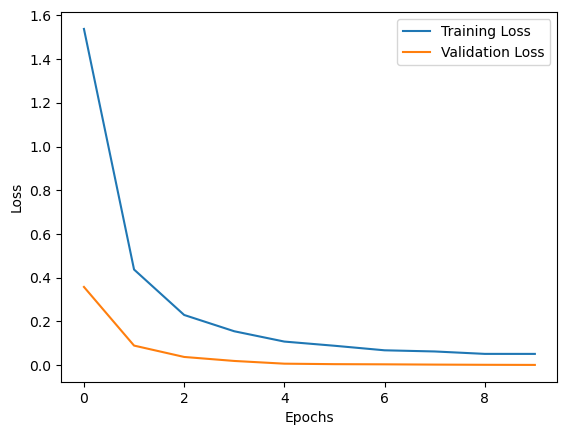

In [33]:
# Plot training and validation accuracy
plt.plot(models.history['accuracy'], label='Training Accuracy')
plt.plot(models.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('training_validation_accuracy2.png')
plt.show()

# Plot testing accuracy and loss
plt.plot(models.history['loss'], label='Training Loss')
plt.plot(models.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('testing_loss_accuracy2.png')
plt.show()

In [34]:
test_dataset = pd.read_csv(r"C:\Users\shrey\Downloads\hand sign\sign_mnist_test.csv")

# Splitting features and labels
X_test = test_dataset.drop('label', axis=1).values
y_test = test_dataset['label'].values

# Reshape and normalize the data
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

# Convert labels to one-hot encoding
y_test = to_categorical(y_test, num_classes=26)

In [35]:
# Evaluate the model on the test set
test_loss, test_accuracy = model2.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

225/225 [==============================] - 1s 3ms/step - loss: 0.3180 - accuracy: 0.9310
Test Loss: 0.3179851770401001
Test Accuracy: 0.9309815764427185


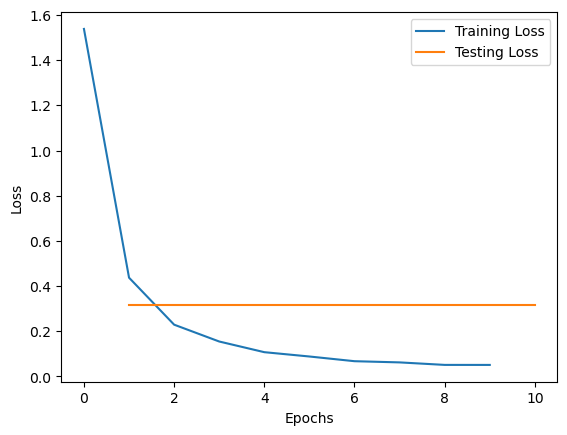

In [36]:
# Plot test loss and train loss
plt.plot(models.history['loss'], label='Training Loss')
plt.plot(range(1, len(models.history['loss']) + 1), [test_loss] * len(models.history['loss']), label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('test_train_loss.png')
plt.show()